In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats 

In [3]:
df = pd.read_csv("/Users/sushmavankayala/Documents/DATA_557/OnlineNewsPopularity/data/OnlineNewsPopularity.csv")
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [5]:
# Function to determine the category
def get_category(row):
    if row[' data_channel_is_lifestyle'] == 1:
        return 'Lifestyle'
    elif row[' data_channel_is_entertainment'] == 1:
        return 'Entertainment'
    elif row[' data_channel_is_bus'] == 1:
        return 'Business'
    elif row[' data_channel_is_socmed'] == 1:
        return 'Social Media'
    elif row[' data_channel_is_tech'] == 1:
        return 'Technology'
    elif row[' data_channel_is_world'] == 1:
        return 'World'
    else:
        return 'Other'

def has_image(row):
    if row[' num_imgs'] > 0 :
        return 1
    else:
        return 0

def has_video(row):
    if row[' num_videos'] > 0 :
        return 1
    else:
        return 0
        
# Apply the function to each row to create the Category column
df['Category'] = df.apply(get_category, axis=1)
df['HasImage'] = df.apply(has_image, axis=1)
df['HasVideo'] = df.apply(has_video, axis=1)

<Axes: xlabel='Category'>

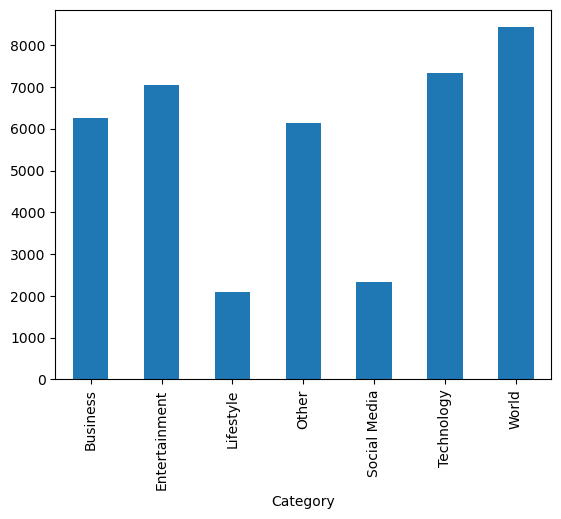

In [6]:
df['Category'].value_counts().sort_index().plot(kind='bar')

In [7]:
d = {'url':'Total Number of Blogs','HasImage':'No of blogs with Image(s)','HasVideo':'No of blogs with Video(s)'}
agg_d = {'url':'size', 'HasImage':'sum', 'HasVideo' : 'sum'}
df_counts = df.groupby('Category', as_index=False).agg(agg_d).rename(columns=d)
df_counts

,Category,Total Number of Blogs,No of blogs with Image(s),No of blogs with Video(s)
0,Business,6258,5509,1365
1,Entertainment,7057,5720,3905
2,Lifestyle,2099,1814,468
3,Other,6134,3859,3469
4,Social Media,2323,2050,681
5,Technology,7346,6164,2071
6,World,8427,7541,2659


Text(0, 0.5, 'Number of Articles')

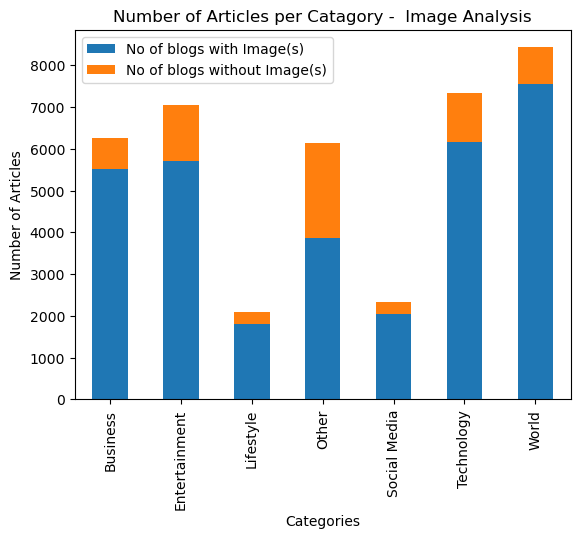

In [9]:
df_counts_for_graph = df_counts[['Category', 'No of blogs with Image(s)', 'Total Number of Blogs' ]]

df_counts_for_graph['No of blogs without Image(s)'] = df_counts_for_graph['Total Number of Blogs'] - df_counts_for_graph['No of blogs with Image(s)']

df_counts_for_graph = df_counts_for_graph.drop('Total Number of Blogs', axis=1)

df_images_plot = df_counts_for_graph.sort_index().plot(x='Category', kind='bar', stacked=True,
        title='Number of Articles per Catagory -  Image Analysis')
df_images_plot.set_xlabel("Categories")
df_images_plot.set_ylabel("Number of Articles")

Text(0, 0.5, 'Number of Articles')

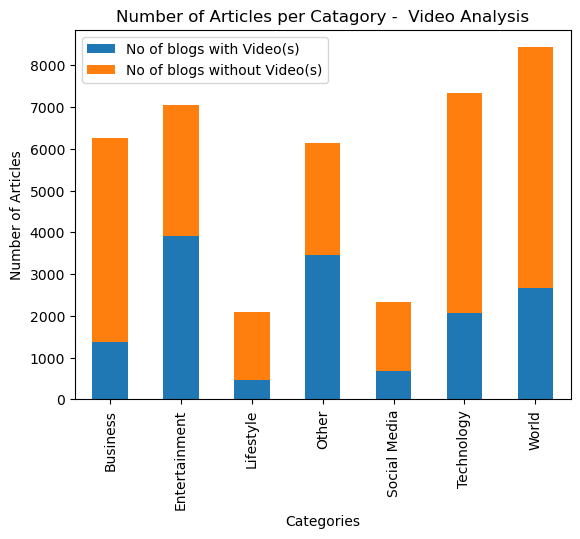

In [10]:
df_counts_for_graph = df_counts[['Category', 'No of blogs with Video(s)', 'Total Number of Blogs' ]]

df_counts_for_graph['No of blogs without Video(s)'] = df_counts_for_graph['Total Number of Blogs'] - df_counts_for_graph['No of blogs with Video(s)']

df_counts_for_graph = df_counts_for_graph.drop('Total Number of Blogs', axis=1)

df_videos_plot = df_counts_for_graph.sort_index().plot(x='Category', kind='bar', stacked=True,
        title='Number of Articles per Catagory -  Video Analysis')
df_videos_plot.set_xlabel("Categories")
df_videos_plot.set_ylabel("Number of Articles")

In [11]:
df_x = df[[' num_imgs', ' num_videos']]
df_y = df[' shares']

In [12]:
df_lifestyle = df[df['Category']== 'Lifestyle']
df_entertainment = df[df['Category']== 'Entertainment']
df_bus = df[df['Category']== 'Business']
df_socmed = df[df['Category']== 'Social Media']
df_tech = df[df['Category']== 'Technology']
df_world = df[df['Category']== 'World']
df_other = df[df['Category']== 'Other']

In [13]:
categories = ['Lifestyle','Entertainment', 'Business','Social Media','Technology','World','Other']

In [14]:
len(df) - (len(df_lifestyle) + len(df_entertainment) + len(df_bus) + len(df_socmed) + len(df_tech) + len(df_world) + len(df_other))

0

In [15]:
# is the number of blogs with images and videos uniformly distributed across all categories?
# chi square goodness of fit
observedData_images  = [len(df_lifestyle[df_lifestyle[' num_imgs'] > 0]),
            len(df_entertainment[df_entertainment[' num_imgs'] > 0]),
            len(df_bus[df_bus[' num_imgs'] > 0]),
            len(df_socmed[df_socmed[' num_imgs'] > 0]),
            len(df_tech[df_tech[' num_imgs'] > 0]),
            len(df_world[df_world[' num_imgs'] > 0]),
            len(df_other[df_other[' num_imgs'] > 0])
           ]

observedData_images

[1814, 5720, 5509, 2050, 6164, 7541, 3859]

In [16]:
# calculating overall proportion of articles with images
p_image = len(df[df[' num_imgs'] > 0]) / len(df)

In [17]:
# calculating expected numbers based on overall proportions
expectedData_images = [len(df_lifestyle) * p_image,
                       len(df_entertainment) * p_image,
                       len(df_bus) * p_image,
                       len(df_socmed) * p_image,
                       len(df_tech) * p_image,
                       len(df_world) * p_image,
                       len(df_other) * p_image,
                      ]

expectedData_images

[1729.0647512864493,
 5813.249142367066,
 5155.067753001715,
 1913.586192109777,
 6051.314751286449,
 6941.795454545454,
 5052.921955403087]

In [18]:
print(sum(expectedData_images))
print(sum(observedData_images))

32657.0
32657


In [19]:
pd.DataFrame({'Category': categories,'Observed':observedData_images, 'Expected':expectedData_images}).sort_values('Category')

,Category,Observed,Expected
2,Business,5509,5155.067753
1,Entertainment,5720,5813.249142
0,Lifestyle,1814,1729.064751
6,Other,3859,5052.921955
3,Social Media,2050,1913.586192
4,Technology,6164,6051.314751
5,World,7541,6941.795455


In [20]:
goodness_of_fit_images = stats.chisquare(observedData_images, expectedData_images) 
print(goodness_of_fit_images)

Power_divergenceResult(statistic=375.61727023741855, pvalue=4.861519213486812e-78)


In [21]:
observedData_video  = [len(df_lifestyle[df_lifestyle[' num_videos'] > 0]),
            len(df_entertainment[df_entertainment[' num_videos'] > 0]),
            len(df_bus[df_bus[' num_videos'] > 0]),
            len(df_socmed[df_socmed[' num_videos'] > 0]),
            len(df_tech[df_tech[' num_videos'] > 0]),
            len(df_world[df_world[' num_videos'] > 0]),
            len(df_other[df_other[' num_videos'] > 0])
           ]

observedData_video

[468, 3905, 1365, 681, 2071, 2659, 3469]

In [27]:
# calculating overall proportion of articles with images
p_video = len(df[df[' num_videos'] > 0]) / len(df)
p_video

0.3687317122389264

In [23]:
expectedData_videos = [len(df_lifestyle) * p_video,
                       len(df_entertainment) * p_video,
                       len(df_bus) * p_video,
                       len(df_socmed) * p_video,
                       len(df_tech) * p_video,
                       len(df_world) * p_video,
                       len(df_other) * p_video,
                      ]

expectedData_videos

[773.9678639895066,
 2602.1396932701036,
 2307.5230551912014,
 856.5637675310261,
 2708.7031581071533,
 3107.302139037433,
 2261.8003228735747]

In [24]:
print(sum(observedData_video))
print(sum(expectedData_videos))

14618
14617.999999999998


In [25]:
pd.DataFrame({'Category': categories,'Observed':observedData_video, 'Expected':expectedData_videos}).sort_values('Category')

,Category,Observed,Expected
2,Business,1365,2307.523055
1,Entertainment,3905,2602.139693
0,Lifestyle,468,773.967864
6,Other,3469,2261.800323
3,Social Media,681,856.563768
4,Technology,2071,2708.703158
5,World,2659,3107.302139


In [26]:
goodness_of_fit_videos = stats.chisquare(observedData_video, expectedData_videos) 
print(goodness_of_fit_videos)

Power_divergenceResult(statistic=2053.3813643977105, pvalue=0.0)
